**Tracking Unique Insect Species in the City of Melbourne**

Authored by: Rohang Shah
Duration: 90 mins
Level: Intermediate
Pre-requisite Skills: Python, Data Analysis, Geospatial Analysis


In the context of urban biodiversity, tracking the presence and distribution of unique insect species can significantly aid in conservation efforts. This use case focuses on identifying and monitoring areas within the City of Melbourne where certain insect species are found uniquely, compared to other areas. By analyzing the insect records collected from the Little Things that Run the City Project and subsequent Melbourne BioBlitz events, the City of Melbourne can pinpoint locations where rare or unique insect species are present. This enables the city to focus conservation efforts on these critical areas to protect and preserve these species and their habitats.

**What this Use Case Will Teach You**
At the end of this use case, you will:

*   Learn how to access and manipulate City of Melbourne Open Data.
*   Develop skills in geospatial data analysis.
*   Gain experience in identifying patterns and anomalies in biodiversity data.
*   Understand how to use data analysis to inform conservation strategies.


**Introduction or Background**
Urbanization poses a significant threat to biodiversity. The City of Melbourne, through projects like the Little Things that Run the City and Melbourne BioBlitz events, has collected valuable data on insect species within the city. This data can be leveraged to identify and protect unique insect species and their habitats. By focusing conservation efforts on areas where these species are found, the City of Melbourne can enhance its biodiversity and ensure the sustainability of its ecosystems.


**User Story**
Title: Protecting Melbourne's Unique Insect Species
As a conservation biologist working with the City of Melbourne, I want to identify and monitor areas within the city where certain insect species are uniquely found so that I can focus conservation efforts on these critical habitats to protect and preserve these species and their ecosystems.

**Scenario**
The City of Melbourne has been collecting insect data through the "Little Things that Run the City" project and the Melbourne BioBlitz events. This data includes observations of various insect species across different locations in the city. As a conservation biologist, my goal is to analyze this data to pinpoint areas with unique insect species that are not found elsewhere. By identifying these critical habitats, the city can prioritize conservation efforts, allocate resources effectively, and develop strategies to protect these unique species from urban development and other threats.







In [ ]:
import requests
import pandas as pd
from io import StringIO
from tabulate import tabulate

def collect_data(dataset_id, apikey=""):
    """
    Collect data from the Melbourne open data platform using the specified dataset ID.
    Parameters:
    dataset_id (str): The ID of the dataset to retrieve.
    apikey (str): The API key for authentication (default is an empty string).

    Returns:
    pd.DataFrame: The dataset in a Pandas DataFrame.
    """
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    format = 'csv'
    suffix = 'exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=true'

    url = f'{base_url}{dataset_id}/{suffix}'
    params = {
        'select': '*',
        'limit': -1,
        'lang': 'en',
        'timezone': 'UTC',
        'api_key': apikey
    }

    response = requests.get(url, params=params)
    response.raise_for_status()


    df = pd.read_csv(StringIO(response.text), delimiter=';')
    return df


DATASET_ID = 'insect-records-in-the-city-of-melbourne-from-little-things-that-run-the-city'


API_KEY = ""


df = collect_data(DATASET_ID, apikey=API_KEY)


print("DataFrame Info:")
print(tabulate(df.info(), headers='keys', tablefmt='psql'))

print("\nDataFrame Description:")
print(tabulate(df.describe(include='all'), headers='keys', tablefmt='psql'))

print("\nFirst 5 Rows of DataFrame:")
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   taxa                  1295 non-null   object 
 1   kingdom               1295 non-null   object 
 2   phylum                1295 non-null   object 
 3   class                 1295 non-null   object 
 4   order                 1295 non-null   object 
 5   family                1290 non-null   object 
 6   genus                 589 non-null    object 
 7   species               264 non-null    object 
 8   identification_notes  1031 non-null   object 
 9   location              1295 non-null   object 
 10  sighting_date         0 non-null      float64
dtypes: float64(1), object(10)
memory usage: 111.4+ KB


DataFrame Description:
+--------+--------+-----------+------------+---------+-------------+--------------+---------+-----------+------------------------+----

Displaying the records in the dataset

In [ ]:

num_records = df.shape[0]
print(f"Number of records in the dataset: {num_records}")


Number of records in the dataset: 1350


Inspecting the column names

In [ ]:

print("Column Names:")
print(df.columns)


Column Names:
Index(['taxa', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus',
       'species', 'identification_notes', 'location', 'sighting_date'],
      dtype='object')


Data cleaning

In [ ]:
# Define a function to extract latitude and longitude from 'location' column
def extract_coordinates(location):
    try:
        # Assuming the location is in the format "(lat, lon)"
        lat, lon = location.strip('()').split(',')
        return float(lat), float(lon)
    except Exception as e:
        return None, None

# Apply the function to create 'latitude' and 'longitude' columns
df['latitude'], df['longitude'] = zip(*df['location'].apply(extract_coordinates))


df_cleaned = df.dropna(subset=['latitude', 'longitude'])


df_cleaned = df_cleaned.drop_duplicates()

# Display cleaned DataFrame information
print("\nCleaned DataFrame Info:")
print(df_cleaned.info())



Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   taxa                  0 non-null      object 
 1   kingdom               0 non-null      object 
 2   phylum                0 non-null      object 
 3   class                 0 non-null      object 
 4   order                 0 non-null      object 
 5   family                0 non-null      object 
 6   genus                 0 non-null      object 
 7   species               0 non-null      object 
 8   identification_notes  0 non-null      object 
 9   location              0 non-null      object 
 10  sighting_date         0 non-null      float64
 11  latitude              0 non-null      object 
 12  longitude             0 non-null      object 
dtypes: float64(1), object(12)
memory usage: 0.0+ bytes
None


Data Analysis - Identifying unique species

In [ ]:
# Identify unique insect species
unique_species = df_cleaned['species'].unique()

# Display number of unique species
num_unique_species = len(unique_species)
print(f"Number of unique insect species: {num_unique_species}")

# Display unique species names
print("Unique insect species names:")
print(unique_species)


Number of unique insect species: 0
Unique insect species names:
[]


Spatial distribution

In [ ]:
import geopandas as gpd

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df_cleaned, geometry=gpd.points_from_xy(df_cleaned['longitude'], df_cleaned['latitude']))

# Display GeoDataFrame information
print("\nGeoDataFrame Info:")
print(gdf.info())

# Display first few rows of GeoDataFrame
print("\nFirst 5 Rows of GeoDataFrame:")
print(gdf.head())



GeoDataFrame Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   taxa                  0 non-null      object  
 1   kingdom               0 non-null      object  
 2   phylum                0 non-null      object  
 3   class                 0 non-null      object  
 4   order                 0 non-null      object  
 5   family                0 non-null      object  
 6   genus                 0 non-null      object  
 7   species               0 non-null      object  
 8   identification_notes  0 non-null      object  
 9   location              0 non-null      object  
 10  sighting_date         0 non-null      float64 
 11  latitude              0 non-null      object  
 12  longitude             0 non-null      object  
 13  geometry              0 non-null      geometry
dtypes: float64(1), geometry(1), object(12)
memory u

Map visualization using folium

In [ ]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from sklearn.cluster import DBSCAN

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))

# Initialize a map centered around Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Add markers for each insect observation
for _, row in gdf.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['species']).add_to(m)

# Display the map
m.save('insect_distribution_map.html')

# Perform DBSCAN clustering
coords = gdf[['latitude', 'longitude']].values
db = DBSCAN(eps=0.01, min_samples=10).fit(coords)
gdf['cluster'] = db.labels_

# Visualize clusters
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)
for cluster in gdf['cluster'].unique():
    cluster_data = gdf[gdf['cluster'] == cluster]
    for _, row in cluster_data.iterrows():
        folium.Marker([row['latitude'], row['longitude']], popup=row['species']).add_to(m)
m.save('insect_clusters_map.html')

m


In [ ]:
import requests
import pandas as pd
from io import StringIO
from tabulate import tabulate  # Import tabulate for pretty tables

def collect_data(dataset_id, apikey=""):
    """
    Collect data from the Melbourne open data platform using the specified dataset ID.
    Parameters:
    dataset_id (str): The ID of the dataset to retrieve.
    apikey (str): The API key for authentication (default is an empty string).

    Returns:
    pd.DataFrame: The dataset in a Pandas DataFrame.
    """
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    format = 'csv'
    suffix = 'exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=true'

    url = f'{base_url}{dataset_id}/{suffix}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        'api_key': apikey  # Provided API key, if any
    }

    response = requests.get(url, params=params)
    response.raise_for_status()  # Raise an exception for HTTP errors

    # Load the CSV data into a DataFrame
    df = pd.read_csv(StringIO(response.text), delimiter=';')
    return df

# Dataset ID
DATASET_ID = 'bioblitz-2016'

# Hide API key (use an environment variable or pass it directly when calling the function)
API_KEY = ""  # Ensure this is set to the correct API key when used in a secure environment

# Fetch data
df = collect_data(DATASET_ID, apikey=API_KEY)

# Display data summary
print("DataFrame Info:")
print(tabulate(df.info(), headers='keys', tablefmt='psql'))  # Display DataFrame information in table format

print("\nDataFrame Description:")
print(tabulate(df.describe(include='all'), headers='keys', tablefmt='psql'))  # Display descriptive statistics in table format

print("\nFirst 5 Rows of DataFrame:")
print(tabulate(df.head(), headers='keys', tablefmt='psql'))  # Display the first few rows of the DataFrame in table format


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   taxa                  1353 non-null   object 
 1   kingdom               1353 non-null   object 
 2   phylum                1322 non-null   object 
 3   class                 1314 non-null   object 
 4   order                 1177 non-null   object 
 5   family                1139 non-null   object 
 6   genus                 953 non-null    object 
 7   species               846 non-null    object 
 8   common_name           802 non-null    object 
 9   identification_notes  588 non-null    object 
 10  data_resource_name    1356 non-null   object 
 11  sighting_date         1350 non-null   object 
 12  latitude              1356 non-null   float64
 13  longitude             1353 non-null   float64
 14  location              0 non-null      float64
 15  geopo

Time series analysis

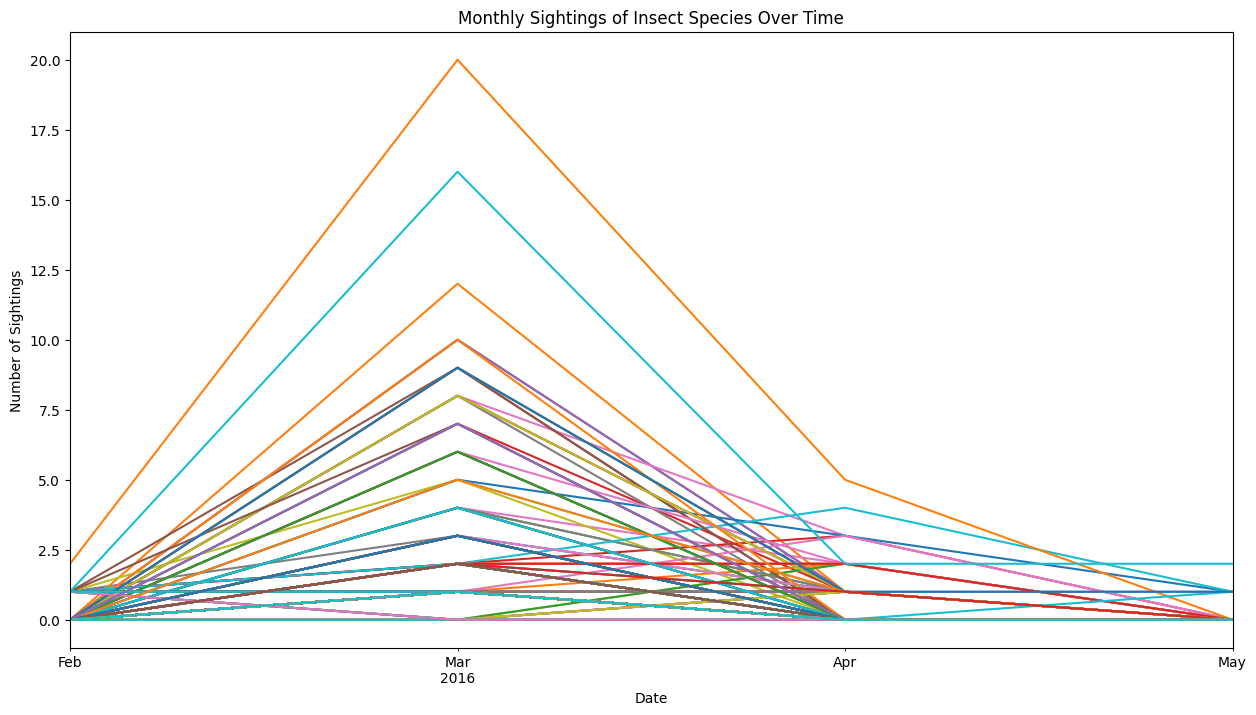

In [ ]:
import matplotlib.pyplot as plt


df['sighting_date'] = pd.to_datetime(df['sighting_date'], errors='coerce')
df = df.dropna(subset=['sighting_date'])

# Group by date and species, and count the number of sightings
time_series = df.groupby([df['sighting_date'].dt.to_period('M'), 'species']).size().unstack().fillna(0)

# Plot time series for selected species
time_series.plot(figsize=(15, 8), legend=False)
plt.title('Monthly Sightings of Insect Species Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sightings')
plt.show()
